## Import libraries

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

import dengue_utils as dutils
import dsutils as du

## Features description

Data from : https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/

Features:

- year
- weekofyear
- city – City abbreviations: sj for San Juan and iq for Iquitos
- week_start_date – Date given in yyyy-mm-dd format

NOAA's GHCN daily climate data weather station measurements

- station_max_temp_c – Maximum temperature
- station_min_temp_c – Minimum temperature
- station_avg_temp_c – Average temperature
- station_precip_mm – Total precipitation
- station_diur_temp_rng_c – Diurnal temperature range

PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)

- precipitation_amt_mm – Total precipitation

NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)

- reanalysis_sat_precip_amt_mm – Total precipitation
- reanalysis_dew_point_temp_k – Mean dew point temperature
- reanalysis_air_temp_k – Mean air temperature
- reanalysis_relative_humidity_percent – Mean relative humidity
- reanalysis_specific_humidity_g_per_kg – Mean specific humidity
- reanalysis_precip_amt_kg_per_m2 – Total precipitation
- reanalysis_max_air_temp_k – Maximum air temperature
- reanalysis_min_air_temp_k – Minimum air temperature
- reanalysis_avg_temp_k – Average air temperature
- reanalysis_tdtr_k – Diurnal temperature range

Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements

- ndvi_se – Pixel southeast of city centroid
- ndvi_sw – Pixel southwest of city centroid
- ndvi_ne – Pixel northeast of city centroid
- ndvi_nw – Pixel northwest of city centroid

NDVI = (NIR — VIS)/(NIR + VIS)

"Calculations of NDVI for a given pixel always result in a number that ranges from minus one (-1) to plus one (+1); however, no green leaves gives a value close to zero. A zero means no vegetation and close to +1 (0.8 - 0.9) indicates the highest possible density of green leaves." (3)

---

NOAA: National Oceanic and Atmosphere Administration
GHCN: Global Historical Climatology Network

(1) https://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets/global-historical-climatology-network-ghcn

PERSIANN-CDR: PRECIPITATION ESTIMATION FROM REMOTELY SENSED INFORMATION USING ARTIFICIAL NEURAL NETWORKS

(2) https://climatedataguide.ucar.edu/climate-data/persiann-cdr-precipitation-estimation-remotely-sensed-information-using-artificial


(3) https://earthobservatory.nasa.gov/features/MeasuringVegetation/measuring_vegetation_2.php


## Load data

In [3]:
# Load dataset

features_train = pd.read_csv('../data/dengue_features_train.csv')
labels_train   = pd.read_csv('../data/dengue_labels_train.csv')

features_test = pd.read_csv('../data/dengue_features_test.csv')

dengue_dataset = pd.concat([features_train, features_test], axis = 0)

# Join train labes and features
dengue_dataset_labeled = dengue_dataset.merge(labels_train, 
                                           left_on = ['city', 'year', 'weekofyear'], 
                                           right_on = ['city', 'year', 'weekofyear'],
                                           how = 'outer')

In [4]:
dengue_dataset_labeled.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0


## Preeliminary exploration

### Describe

In [5]:
dengue_dataset_labeled.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1872.0,2003.194979,6.292268,1990.000000,1999.000000,2004.000000,2008.000000,2013.000000
weekofyear,1872.0,26.489316,15.006319,1.000000,13.750000,26.000000,39.000000,53.000000
ndvi_ne,1635.0,0.138588,0.146413,-0.463400,0.035300,0.127317,0.252225,0.508357
ndvi_nw,1809.0,0.129713,0.125082,-0.456100,0.041225,0.115200,0.223360,0.649000
ndvi_se,1849.0,0.204663,0.075064,-0.015533,0.153457,0.197029,0.250857,0.538314
ndvi_sw,1849.0,0.202174,0.085768,-0.063457,0.141014,0.188229,0.248086,0.546017
precipitation_amt_mm,1857.0,44.109278,42.065868,0.000000,9.430000,36.640000,67.500000,390.600000
reanalysis_air_temp_k,1860.0,298.727770,1.387410,294.554286,297.678929,298.617143,299.891429,302.200000
reanalysis_avg_temp_k,1860.0,299.253955,1.272510,294.892857,298.276786,299.300000,300.271429,303.328571
reanalysis_dew_point_temp_k,1860.0,295.284823,1.528046,289.642857,294.164643,295.667143,296.502857,298.450000


### Missing values

In [6]:
# Incluir label
dd_labeled = dengue_dataset.merge(labels_train, 
                                  left_on = ['city', 'year', 'weekofyear'], 
                                  right_on = ['city', 'year', 'weekofyear'],
                                  how = 'outer')

# Creamos un dataframe que contenga el número de missing values para cada columna
# Número de missing values: dengue_dataset_labeled.shape[0] - dengue_dataset_labeled.count()
# shape[0] - contiene en número de filas del dataframe
# count() - el número de valores distintos a null para cada columna

df_count_dengue = pd.DataFrame(dd_labeled.shape[0] - dd_labeled.count(), columns=['missing_values'])
df_count_dengue['missing_values_per'] = np.round((df_count_dengue['missing_values'] * 100) / dd_labeled.shape[0], 2)

# Solo las filas con missing_value > 0
df_count_dengue = df_count_dengue.loc[df_count_dengue['missing_values']>0,]

# Ordenamos el resultado
df_count_dengue = df_count_dengue.sort_values(by='missing_values')

df_count_dengue

,missing_values,missing_values_per
reanalysis_precip_amt_kg_per_m2,12,0.64
reanalysis_tdtr_k,12,0.64
reanalysis_specific_humidity_g_per_kg,12,0.64
reanalysis_relative_humidity_percent,12,0.64
reanalysis_max_air_temp_k,12,0.64
reanalysis_dew_point_temp_k,12,0.64
reanalysis_min_air_temp_k,12,0.64
reanalysis_air_temp_k,12,0.64
reanalysis_avg_temp_k,12,0.64
precipitation_amt_mm,15,0.80


- Here, we see that there are some missing values. 
- *ndvi_ne* is the feature with the higher number of missing values. 

### Line plot of total_cases for both cities

/Users/rocio/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


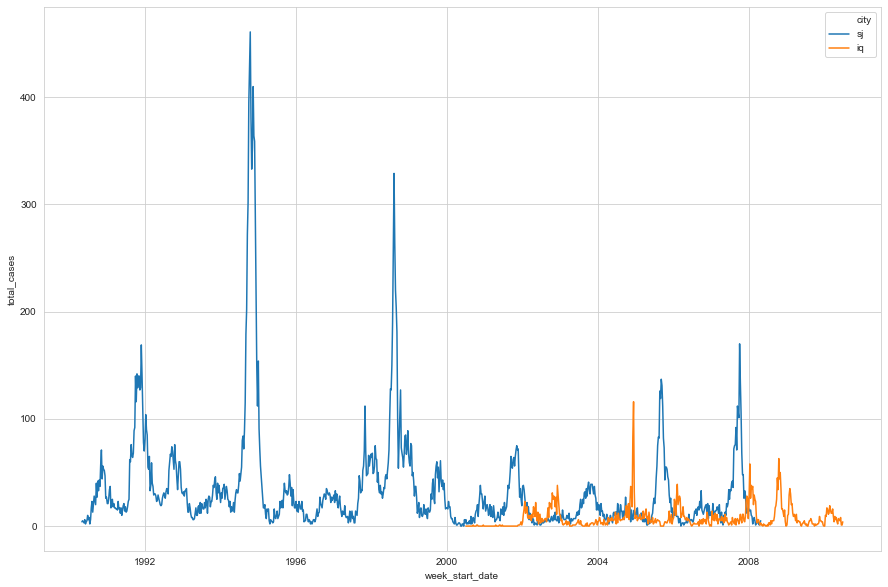

In [7]:
dd_labeled['week_start_date'] = pd.to_datetime(dd_labeled['week_start_date'])

du.show_lineplot(dd_labeled, xvalue='week_start_date', yvalue='total_cases', hue='city')

The evolution of the number of total cases in both cities is quite diferent. For this reason, each city should be explored separately.

### Boxplots

20191020 - 12:M:11: show_bloxplot: omiting city
20191020 - 12:M:11: show_bloxplot: omiting year
20191020 - 12:M:11: show_bloxplot: omiting week_start_date


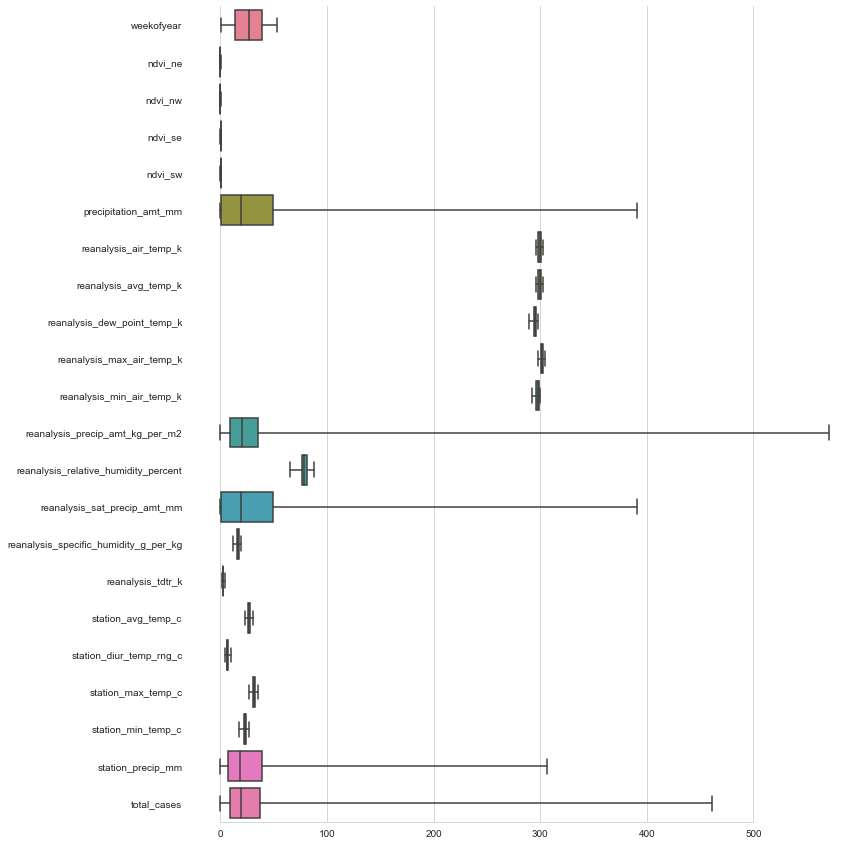

In [8]:
du.show_boxplot(dd_labeled[dd_labeled['city']=='sj'], exclude=['year'])

20191020 - 12:M:12: show_bloxplot: omiting city
20191020 - 12:M:12: show_bloxplot: omiting year
20191020 - 12:M:12: show_bloxplot: omiting week_start_date


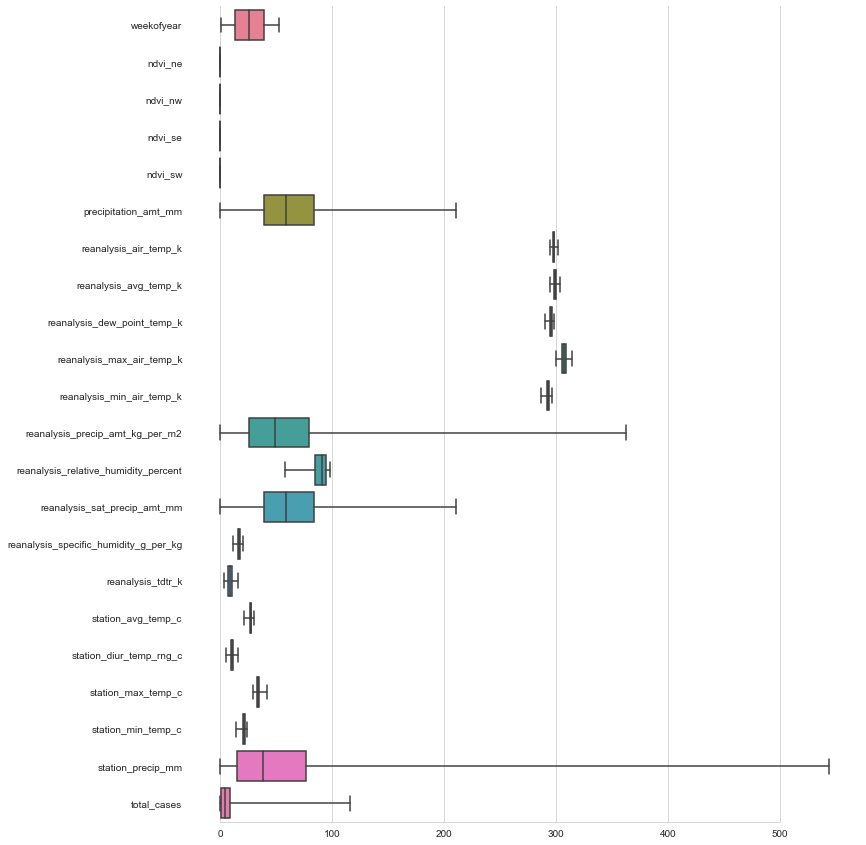

In [9]:
du.show_boxplot(dd_labeled[dd_labeled['city']=='iq'], exclude=['year'])

### Temperature conversion
In respect to temeperature features, it seems that some of them are expressed different units. 

20191020 - 12:M:13: show_bloxplot: omiting city
20191020 - 12:M:13: show_bloxplot: omiting year
20191020 - 12:M:13: show_bloxplot: omiting week_start_date


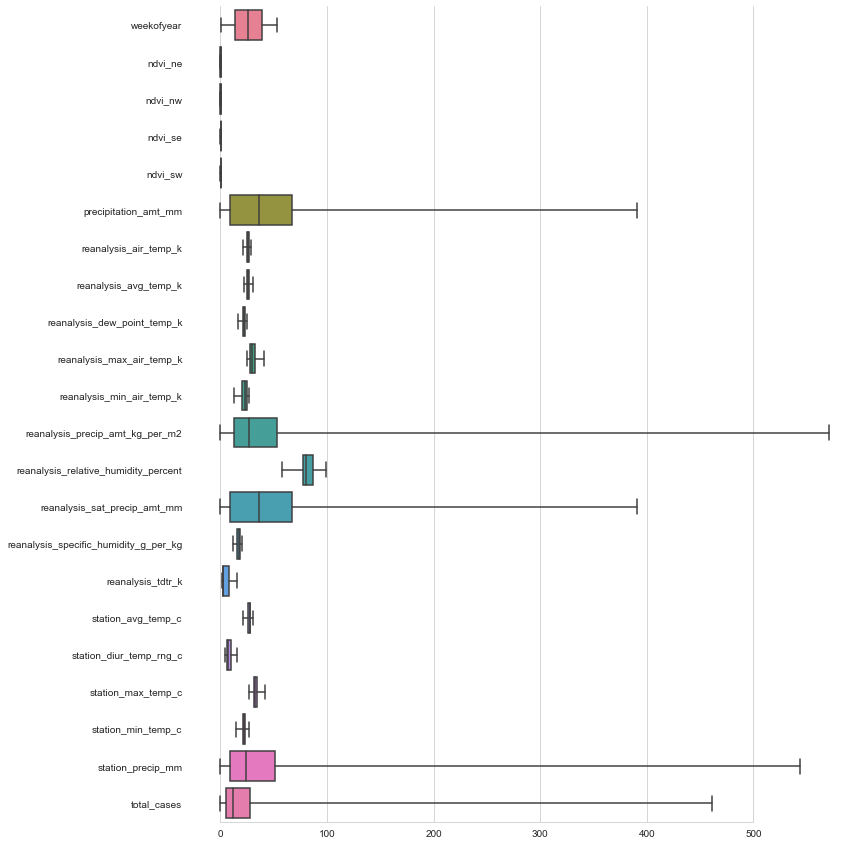

In [10]:
import pytemperature

features = ['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 
            'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
            'reanalysis_avg_temp_k']

# Conversion kelvin to celsius
dd_labeled[features] = dd_labeled[features].apply(pytemperature.k2c, axis=1)
du.show_boxplot(dd_labeled, exclude=['year'])

**NOTE:** reanalysis_tdtr_c takes extreme temperature values, I wil remove that feature at the moment.

### Correlation matrix for each city

####  San Juan

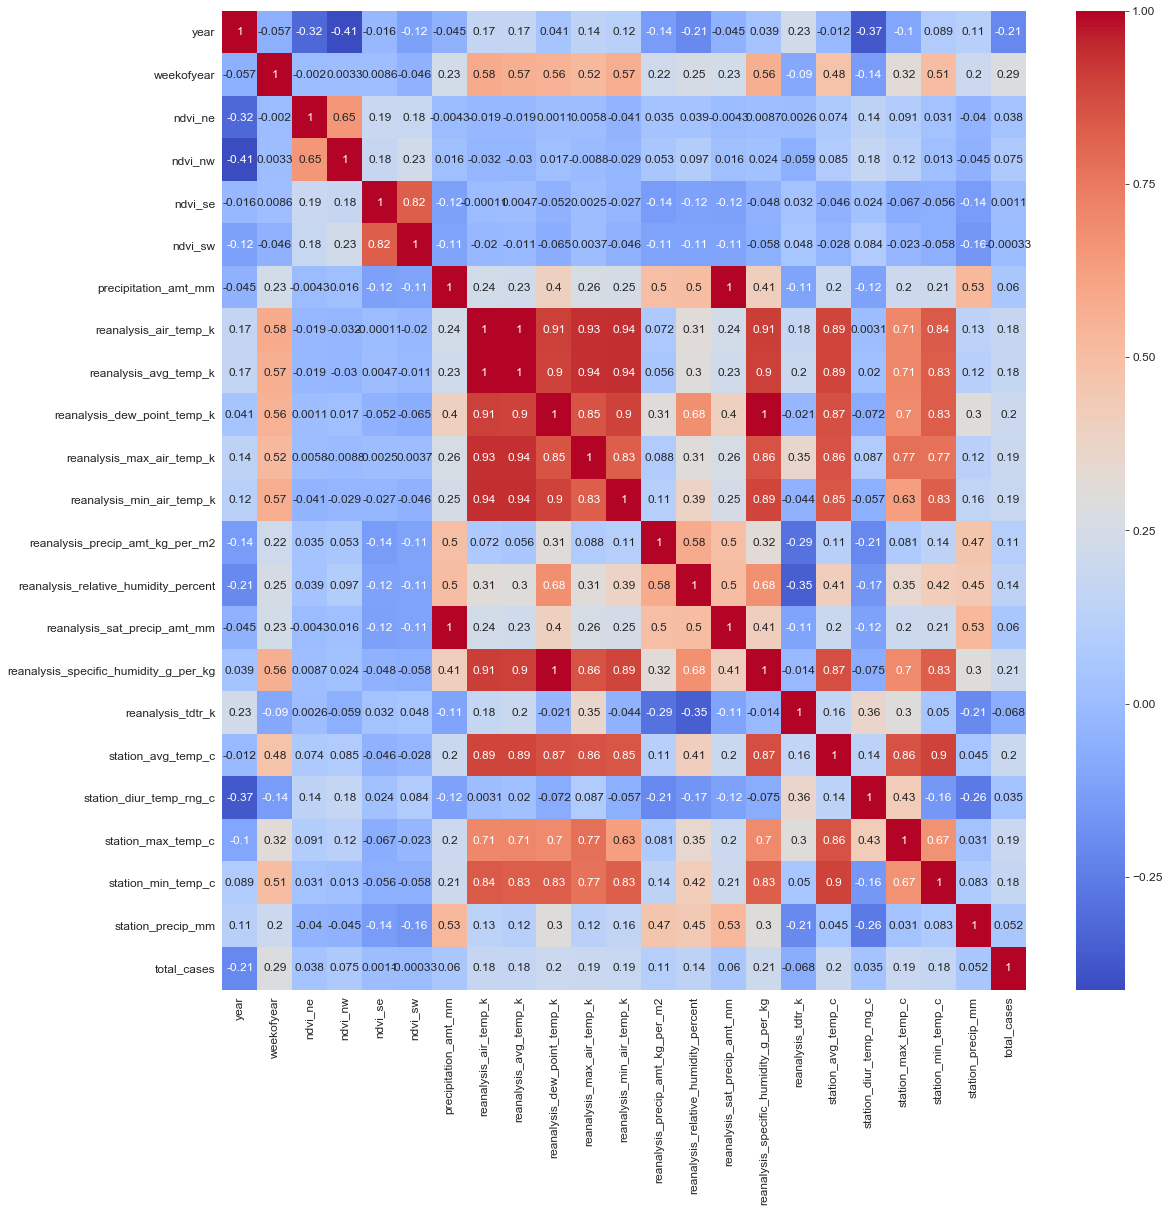

In [11]:
du.show_heatmap(dd_labeled[dd_labeled['city']=='sj'], exclude = ['city'])

#### Iquitos

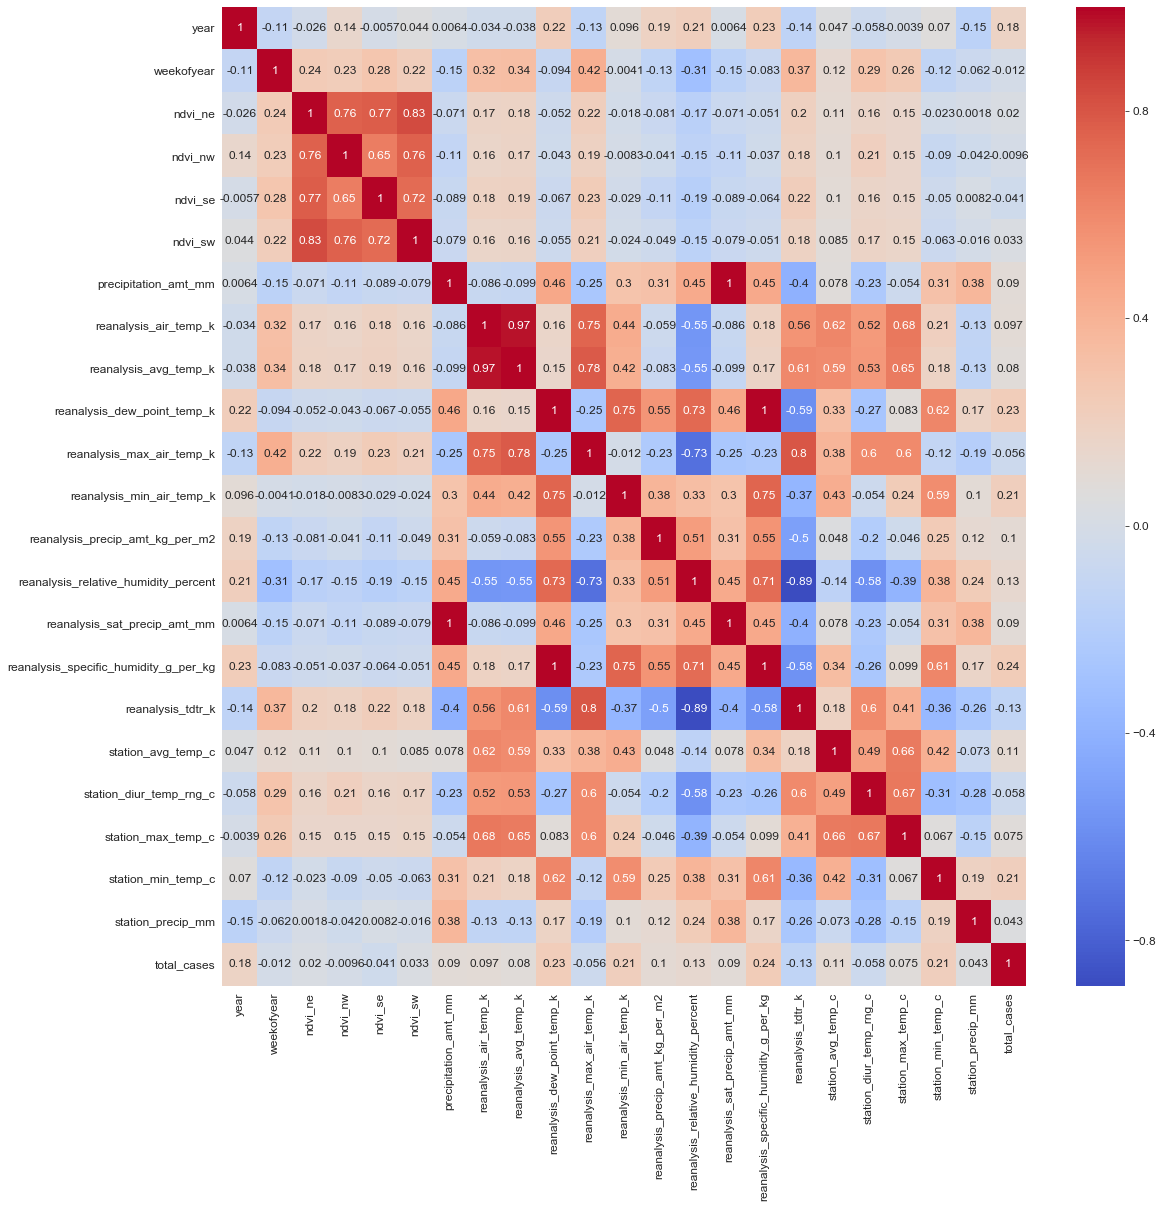

In [12]:
du.show_heatmap(dd_labeled[dd_labeled['city']=='iq'], exclude = ['city'])

- For both cities, the label (total_cases) doesn't show correlation with other features
- There is colineality among features, for example temperature features. It will be necesary some feature selection to avoid this colineality.
- In the next plot we can see the relationship betwen the features and the label:

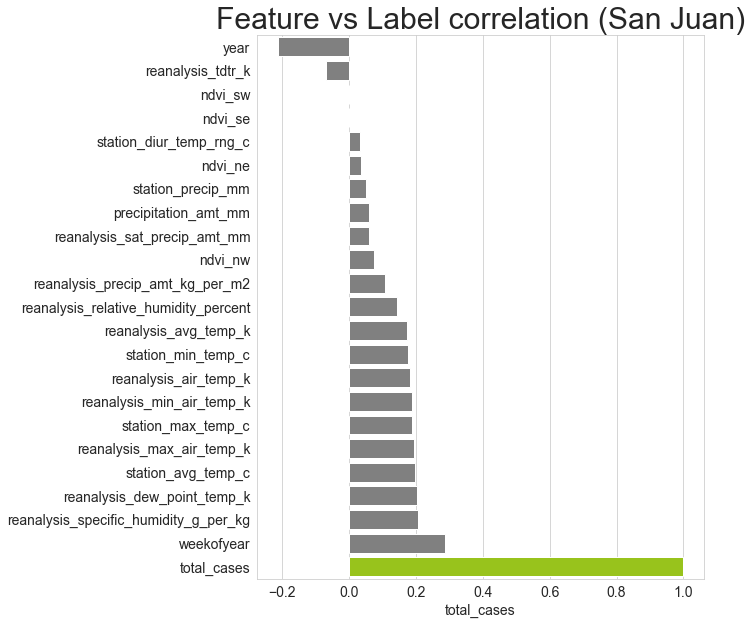

In [13]:
du.show_feature_correlation(dd_labeled[dd_labeled['city']=='sj'], 
                            label = 'total_cases', 
                            title= 'Feature vs Label correlation (San Juan)', 
                            exclude = ['city'])

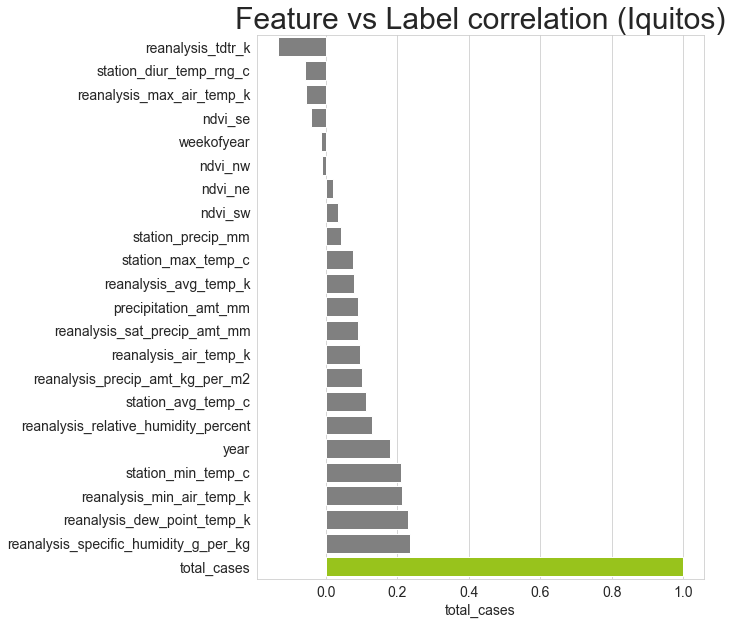

In [14]:
du.show_feature_correlation(dd_labeled[dd_labeled['city']=='iq'], 
                            label = 'total_cases', 
                            title= 'Feature vs Label correlation (Iquitos)', 
                            exclude = ['city'])

### Feature analysis

- Missing values
- Variability
- Correlation with label

In [15]:
import seaborn as sns

def get_feature_analysis(df):
    
    features_analysis = pd.DataFrame()

    for city in df.loc[:,'city'].unique():

        temp = pd.DataFrame()
        df_city = df.loc[df.loc[:,'city']==city,:]

        # number of missing values
        describe_df = pd.DataFrame(df_city.describe().T)
        describe_df.loc[:,'count'].max()

        max_number_of_rows = describe_df.loc[:,'count'].max()
        number_of_values   = describe_df.loc[:,'count']

        temp.loc[:,'missing_values'] = max_number_of_rows - number_of_values

        # feature variability

        temp['variance'] = df_city.var(axis=0)
        temp['cv'] =  df_city.std(axis=0) / df_city.mean(axis=0)

        # correlation with label
        if 'total_cases' in df_city.columns:
            temp['label_corr'] = np.abs(df_city.corr()['total_cases'])

        temp['city'] = city

        features_analysis = pd.concat([features_analysis, temp], axis=0)
        
    return features_analysis
    
def get_last_weeks_data(df, window_size=12):
    
    train_dataset_lastweeks = pd.DataFrame()

    for city in df.loc[:,'city'].unique():

        temp = df.loc[df.loc[:,'city']==city,:]

        # wheather variables selection
        climate_variables = temp.columns.copy() 
        if 'total_cases' in climate_variables:
            climate_variables = climate_variables.drop('total_cases')   
        # drop features don't related to weather
        climate_variables = climate_variables.drop(['weekofyear', 'city', 'week_start_date', 'year'])

        for j, climate_variable in enumerate(climate_variables):
            temp.loc[:,climate_variable] = (temp.sort_values(['city', 'year', 'weekofyear'], 
                                                       ascending=True).loc[:,climate_variable]
                                           .rolling(window=window_size).median())


        train_dataset_lastweeks = pd.concat([train_dataset_lastweeks, temp], axis=0)    
    
    return train_dataset_lastweeks


In [16]:
features_analysis = get_feature_analysis(dd_labeled)

#features_analysis.sort_values('label_corr', ascending=False)

#features_analysis.loc[features_analysis['city'] == 'sj',:].sort_values('label_corr', ascending=False)

In [17]:
#features_analysis.loc[features_analysis['city'] == 'iq',:].sort_values('label_corr', ascending=False)

Correlation among features and the label is quite low for both cities and for all features. For San Juan, variables more interesting could be: 

- reanalysis_specific_humidity_g_per_kg, 
- reanalysis_dew_point_temp_c
- station_avg_temp_c
- reanalysis_max_air_temp_c

Iquitos:

- reanalysis_specific_humidity_g_per_kg
- reanalysis_dew_point_temp_c
- reanalysis_min_air_temp_c
- station_min_temp_c

But none of them reaches a correlation with the target greater than 0.3. 

However, we must consider that dengue is a contagious disease transmitted by a virus, which in turn is transmitted by a mosquito. High temperatures, humidity and standing water could influence the proliferation of these insects. In addition, we have to take into account the incubation time of the virus. This could take weeks before the manifestation of symptoms. 

In [18]:
dengue_dataset_labeled.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0


In [19]:
# wheather variables selection
climate_variables = dd_labeled.columns.copy() 
window_size = 12

if 'total_cases' in climate_variables:
    climate_variables = climate_variables.drop('total_cases')   
# drop features don't related to weather
climate_variables = climate_variables.drop(['weekofyear', 'city', 'week_start_date', 'year'])
climate_variables

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [20]:
# Assign to each row the median value of the last 12 weeks
dd_window = dd_labeled.sort_values(['city', 'year', 'weekofyear'], ascending=True)

dd_window_sj = dd_window.loc[dd_window['city']=='sj',:]
dd_window_iq = dd_window.loc[dd_window['city']=='iq',:]

dd_window_sj.loc[:,climate_variables] = dd_window_sj.loc[:,climate_variables].rolling(window=4).mean()
dd_window_iq.loc[:,climate_variables] = dd_window_iq.loc[:,climate_variables].rolling(window=16).mean()

dd_window = pd.concat([dd_window_sj, dd_window_iq], axis=0)

/Users/rocio/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [21]:
label = "total_cases"

# correlation between target feature and the others for original dataset
df_corr_l_sj = dd_labeled.loc[dd_labeled['city']=='sj',:].corr()
df_corr_l_iq = dd_labeled.loc[dd_labeled['city']=='iq',:].corr()

df_corr_l_sj = df_corr_l_sj.sort_values(label)[[label]]
df_corr_l_sj['city'] = 'sj'
df_corr_l_sj['mode'] = 'labeled'

df_corr_l_iq = df_corr_l_iq.sort_values(label)[[label]]
df_corr_l_iq['city'] = 'iq'
df_corr_l_iq['mode'] = 'labeled'

# correlation between target feature and the others for data using the window
df_corr_w_sj = dd_window.loc[dd_window['city']=='sj',:].corr()
df_corr_w_iq = dd_window.loc[dd_window['city']=='iq',:].corr()

df_corr_w_sj = df_corr_w_sj.sort_values(label)[[label]]
df_corr_w_sj['city'] = 'sj'
df_corr_w_sj['mode'] = 'window'

df_corr_w_iq = df_corr_w_iq.sort_values(label)[[label]]
df_corr_w_iq['city'] = 'iq'
df_corr_w_iq['mode'] = 'window'

df_corr = pd.concat([df_corr_l_sj, df_corr_l_iq, df_corr_w_sj, df_corr_w_iq], axis=0)
df_corr.reset_index(inplace=True)

df_corr = df_corr.rename(columns = {"index" : "feature"})
df_corr.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
feature,92,23,reanalysis_tdtr_k,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_cases,92,NaN,NaN,NaN,0.138953,0.218055,-0.21269,0.0298032,0.121912,0.20199,1
city,92,2,iq,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mode,92,2,window,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN


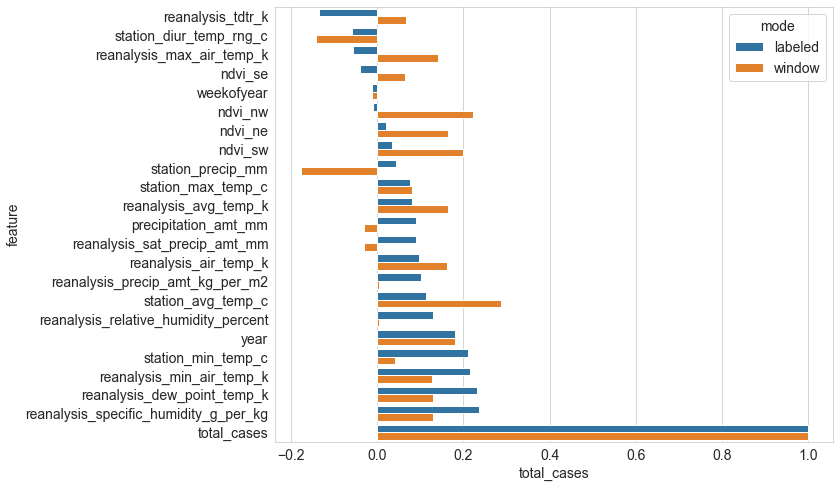

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
sns.barplot(data=df_corr.loc[df_corr['city']=='iq',:], y="feature", x="total_cases",  hue="mode")

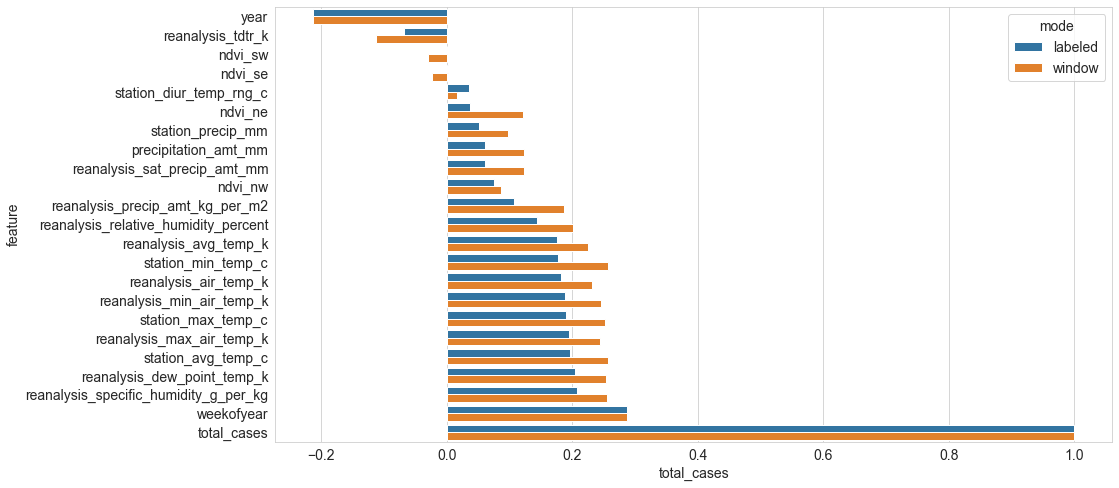

In [25]:
fig = plt.figure(figsize=(15, 8))
sns.barplot(data=df_corr.loc[df_corr['city']=='sj',:], y="feature", x="total_cases",  hue="mode")

In [26]:
dd_labeled.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,24.422857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,25.061429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,25.631429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,25.837143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,26.368571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0


In [56]:
train_features = ['reanalysis_specific_humidity_g_per_kg',  
                  'reanalysis_dew_point_temp_k',
                  'station_avg_temp_c']
city = 'sj'
rows = []
for feature in train_features:
    for p in np.arange(1,10):
        dd_city = dd_labeled.loc[:,['city','year','weekofyear','total_cases'] + [feature]]

        dd_city = dd_city.loc[dd_labeled['city']==city,:]
        dd_city = dd_city.sort_values(['year', 'weekofyear'], ascending=True)

        dd_city.loc[:,feature] = dd_city.loc[:,feature].shift(periods=p)
        dd_city.loc[:,feature] = dd_city.loc[:,feature].fillna(method='ffill')

        corr = dd_city['total_cases'].corr(dd_city[feature])
        
        row = [feature, p, corr]
        rows.append(row)

In [57]:
pd.DataFrame(rows)

,0,1,2
0,reanalysis_specific_humidity_g_per_kg,1,0.223962
1,reanalysis_specific_humidity_g_per_kg,2,0.246747
2,reanalysis_specific_humidity_g_per_kg,3,0.263423
3,reanalysis_specific_humidity_g_per_kg,4,0.280939
4,reanalysis_specific_humidity_g_per_kg,5,0.288804
5,reanalysis_specific_humidity_g_per_kg,6,0.294602
6,reanalysis_specific_humidity_g_per_kg,7,0.299057
7,reanalysis_specific_humidity_g_per_kg,8,0.303252
8,reanalysis_specific_humidity_g_per_kg,9,0.298776
9,reanalysis_dew_point_temp_k,1,0.219971


##### df.shift(periods=-3)

### Density plots

These plots confirms the observed in previous analysis. Cities should be studied by saparate. Weather and total_cases are diferent in both cities.

In [128]:
dd_labeled.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

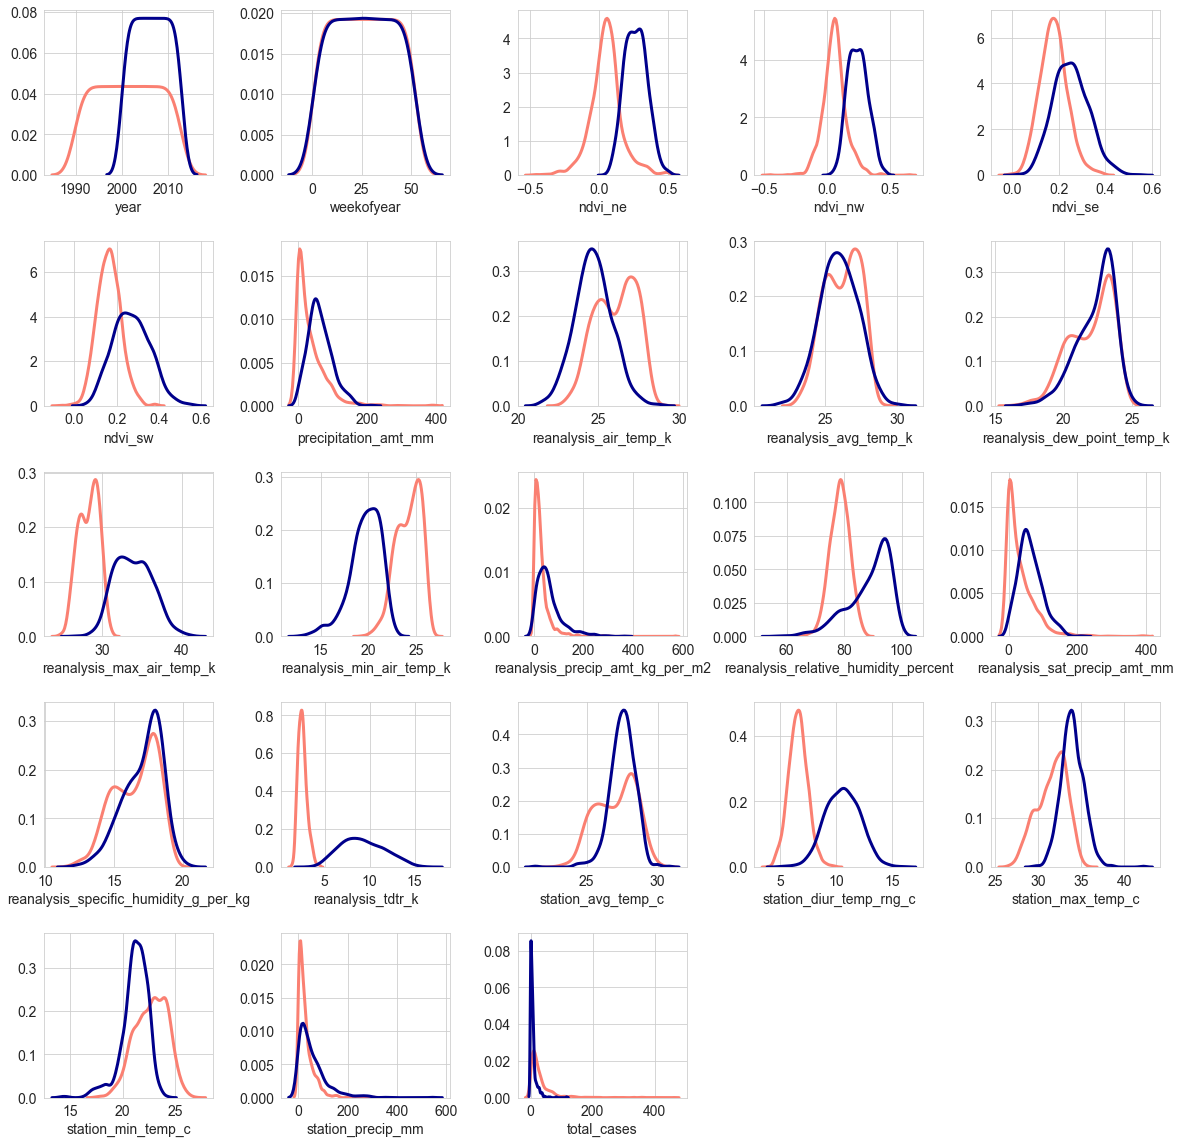

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

features = dd_labeled.columns.drop(['week_start_date', 'city'])

fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, column in enumerate(features):

    ax = fig.add_subplot(5, 5, i+1)

    data_sj = dd_labeled[dd_labeled['city']=='sj'][column]
    data_iq = dd_labeled[dd_labeled['city']=='iq'][column]
    
    sns.distplot(data_sj, hist=False, kde=True, bins=int(180/5), color = 'salmon', 
             hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 3})
    
    sns.distplot(data_iq, hist=False, kde=True, bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 3})

### Scatter plots

Here, I plot the scatter plot of each feature vs total_cases for both cities. (Blue = san juan, Salmon = Iquitos)

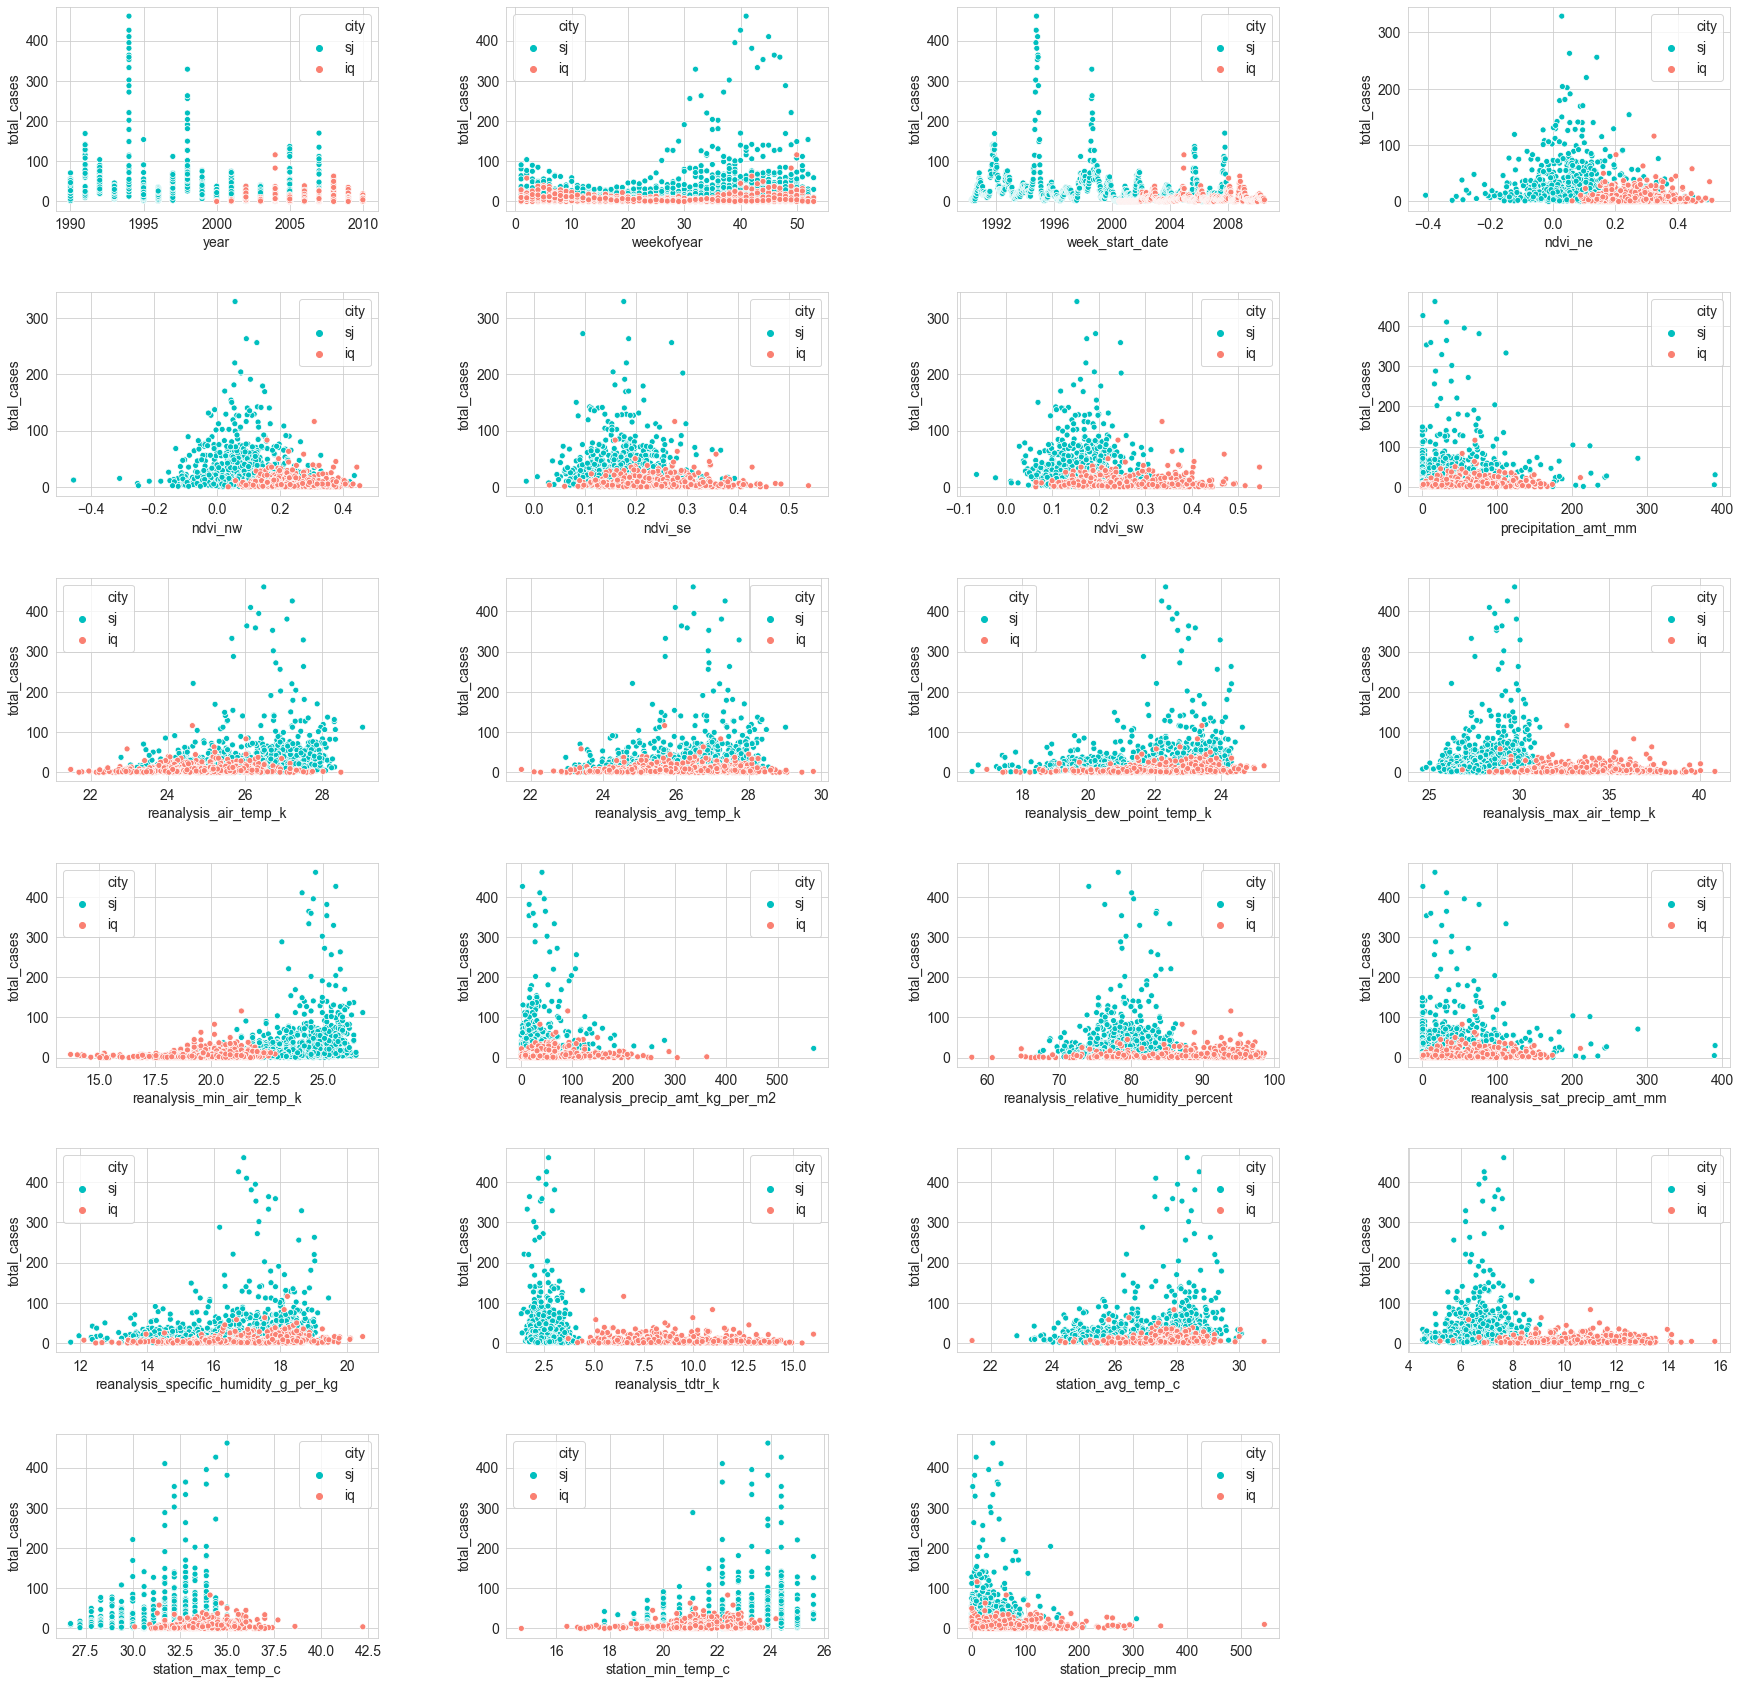

In [131]:
features = dd_labeled.columns.drop(['city', 'total_cases'])

fig = plt.figure(figsize=(30, 30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, column in enumerate(features):

    ax = fig.add_subplot(6, 4, i+1)
    
    sns.scatterplot(x=column, y="total_cases", 
                    hue='city', data=dd_labeled, 
                    palette = dict(iq="salmon", 
                                   sj="c")) 

## Add new variables

In [132]:
## Add month of the year

dd_labeled['week_start_date'] = pd.to_datetime(dd_labeled['week_start_date'])
dd_labeled['monthofyear'] = dd_labeled['week_start_date'].apply(lambda x: x.month)


# High correlation between ndvi_nw-ndvi-ne and ndvi-sw-ndvi-se
# Add the mean of each pair that indicates the level of vegetation in the north and south of both cities.

# Features engineering

dd_labeled['ndvi_north'] = dd_labeled[['ndvi_nw', 'ndvi_ne']].mean(axis=1)
dd_labeled['ndvi_south'] = dd_labeled[['ndvi_sw', 'ndvi_se']].mean(axis=1)

#Remove feature

dd_labeled = dd_labeled.drop(['ndvi_sw', 'ndvi_nw', 'ndvi_ne', 'ndvi_se', 'week_start_date'], axis=1)

In [133]:
dd_labeled.head()

,city,year,weekofyear,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,monthofyear,ndvi_north,ndvi_south
0,sj,1990,18,12.42,24.422857,24.592857,19.264286,26.65,22.75,32.00,...,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0,4,0.113162,0.188050
1,sj,1990,19,22.82,25.061429,25.292857,20.801429,27.75,23.25,17.94,...,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0,5,0.156037,0.158921
2,sj,1990,20,34.54,25.631429,25.728571,22.284286,27.35,24.15,26.10,...,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0,5,0.102608,0.164021
3,sj,1990,21,15.36,25.837143,26.078571,22.160000,28.25,23.85,13.90,...,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0,5,0.186850,0.231721
4,sj,1990,22,7.52,26.368571,26.514286,22.671429,28.75,24.35,12.20,...,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0,5,0.229200,0.249270
